In [1]:
# load data
import scanpy as sc
wolock = sc.read('/home/hsher/processed_single_cell_data/wolock.h5ad')
tik = sc.read('/home/hsher/processed_single_cell_data/tikhonova.h5ad')
bary = sc.read('/home/hsher/processed_single_cell_data/baryawno.h5ad')

import sys
sys.path.append('/home/hsher/scSecretome')
from scSecretome.annot import *
from scSecretome.sc import *

scanpy==1.4.4.post1 anndata==0.6.22.post1 umap==0.3.10 numpy==1.17.3 scipy==1.3.1 pandas==0.25.2 scikit-learn==0.21.3 statsmodels==0.10.1 python-igraph==0.7.1 louvain==0.6.1


In [3]:
w = mice_to_human(wolock)

In [4]:
w.var_names

Index(['KIAA1841', 'C17orf49', 'C2orf68', 'C4orf19', 'C11orf58', 'C9orf16',
       'CXorf40A', 'C9orf24', 'C11orf1', 'C3orf80',
       ...
       'COX2', 'COX3', 'CYTB', 'ND1', 'ND2', 'ND3', 'ND4', 'ND4L', 'ND5',
       'ND6'],
      dtype='object', name='index', length=16881)

In [5]:
t = mice_to_human(tik)

In [6]:
t.var_names

Index(['KIAA1841', 'C17orf49', 'C2orf68', 'C4orf19', 'C11orf58', 'C9orf16',
       'CXorf40A', 'C9orf24', 'C11orf1', 'C3orf80',
       ...
       'ZSWIM8', 'ZW10', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDC', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', name='index', length=11989)

In [7]:
b = mice_to_human(bary)

In [8]:
b.var_names

Index(['XKR4', 'RP1', 'SOX17', 'MRPL15', 'LYPLA1', 'TCEA1', 'RGS20', 'ATP6V1H',
       'OPRK1', 'NPBWR1',
       ...
       'COX3', 'ND3', 'ND4L', 'ND4', 'ND5', 'ND6', 'CYTB', 'VAMP7', 'SPRY3',
       'TMLHE'],
      dtype='object', name='index', length=17250)

# after we map the genes to human homolog, are we still able to show the previous results?

In [9]:
sc.pp.highly_variable_genes(b)
sc.tl.pca(b, svd_solver='arpack')

# compute neibors for PC
sc.pp.neighbors(b, n_neighbors=4, n_pcs=40) # wolock as slightly different params
    
# compute umap
sc.tl.umap(b) 
    
# compute louvain cluster
sc.tl.louvain(b)

extracting highly variable genes
    finished (0:00:03)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.var` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:09)
computing neighbors
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/scanpy

    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:08)
computing UMAP


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:25)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 43 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:01)


In [10]:
id_map = human_mouse_homolog()
markers = id_map.loc[id_map['Mouse'].isin(['Lepr', 'Cxcl12','Bglap', 'Acan', 'Col2a1', 'S100a4', 'Cdh5', 'Acta2']), 'Human'].tolist()

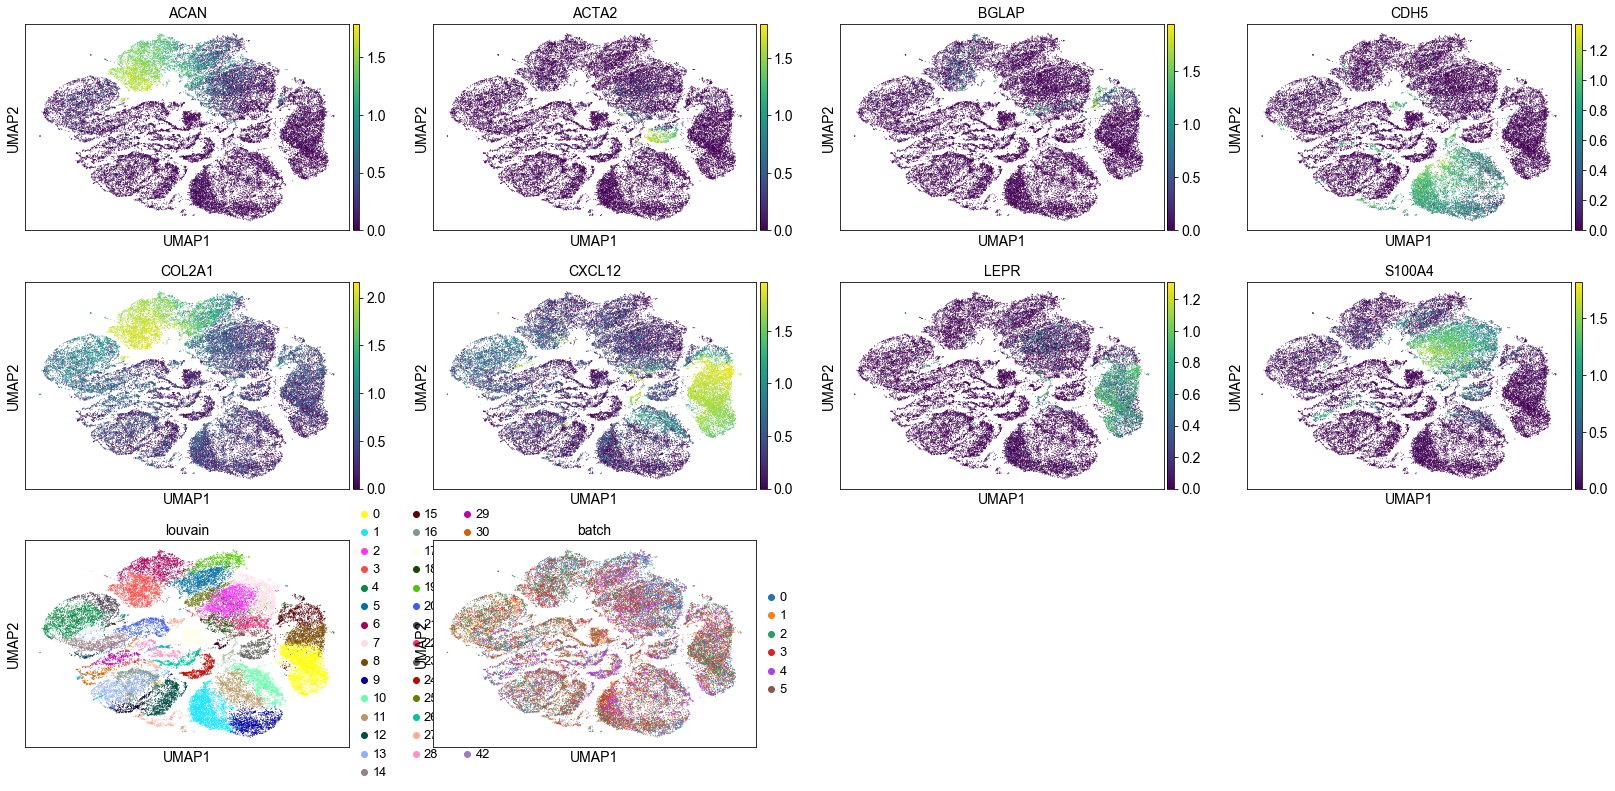

In [11]:
sc.pl.umap(b, color = markers + ['louvain', 'batch'])

running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:04)
--> added 'pos', the PAGA positions (adata.uns['paga'])


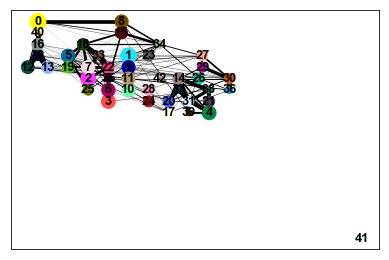

In [12]:
# pseudotime analysis
sc.tl.paga(b, groups = 'louvain')
sc.pl.paga(b, layout='rt', root = [0,8]) 

In [13]:
b.write('/home/hsher/processed_single_cell_data/baryawno_mapped.h5ad')

### wolock

In [14]:
sc.pp.highly_variable_genes(w)
sc.tl.pca(w, svd_solver='arpack')

# compute neibors for PC
sc.pp.neighbors(w, n_neighbors=4, n_pcs=40) # wolock as slightly different params
    
# compute umap
sc.tl.umap(w) 
    
# compute louvain cluster
sc.tl.louvain(w)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.var` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:02)
computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 3 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 23 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


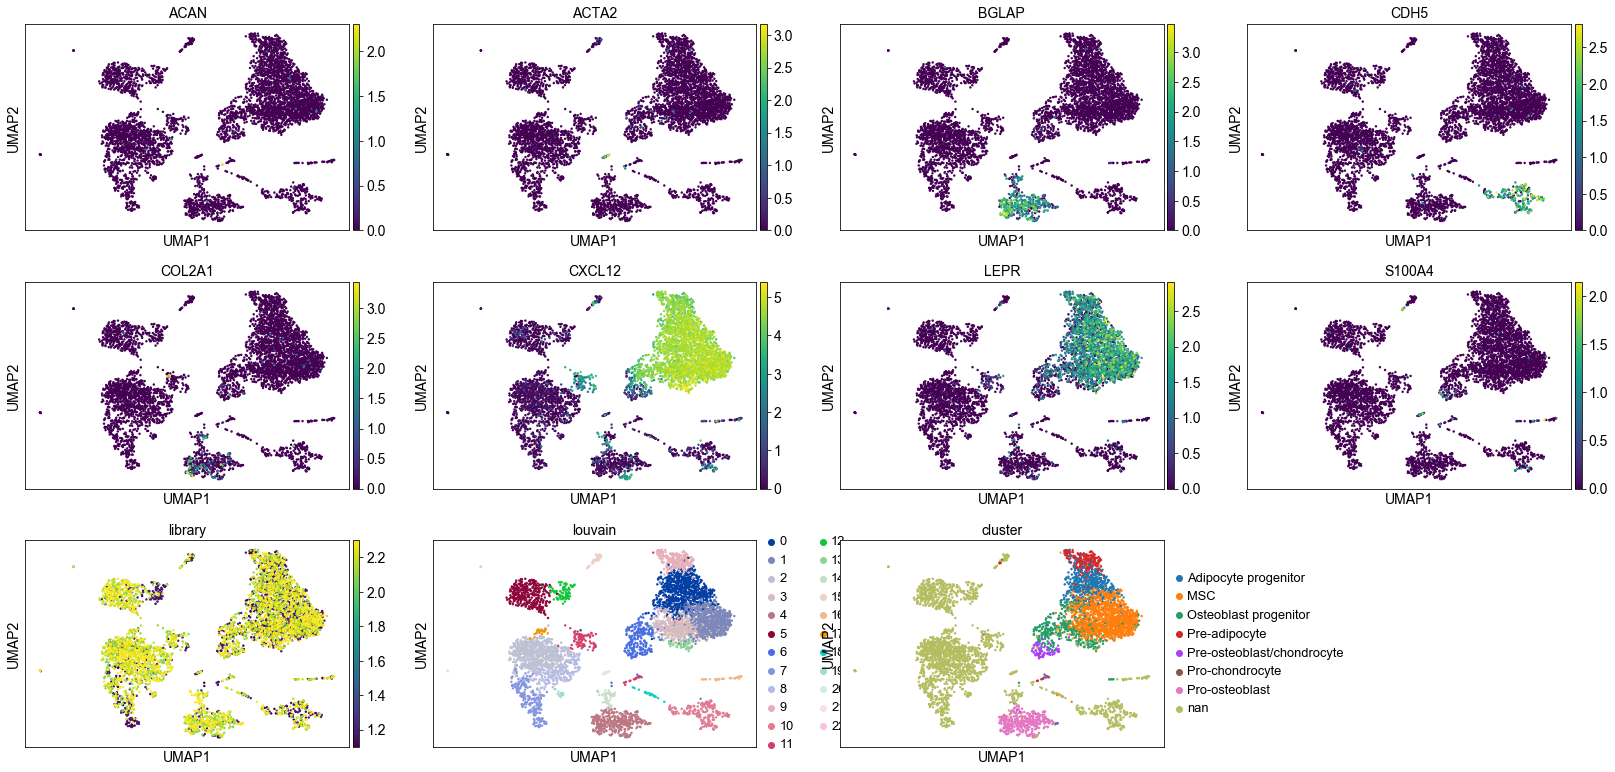

In [15]:
sc.pl.umap(w, color = markers+ ['library','louvain', 'cluster'])

In [16]:
w.write('/home/hsher/processed_single_cell_data/wolock_mapped.h5ad')

# Tichknova

In [17]:
sc.pp.highly_variable_genes(t)
sc.tl.pca(t, svd_solver='arpack')

# compute neibors for PC
sc.pp.neighbors(t, n_neighbors=4, n_pcs=40) # wolock as slightly different params
    
# compute umap
sc.tl.umap(t) 
    
# compute louvain cluster
sc.tl.louvain(t)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


Trying to set attribute `.var` of view, making a copy.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 40


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  state.func_ir.loc))


    finished: added to `.uns['neighbors']`
    'distances', distances for each pair of neighbors
    'connectivities', weighted adjacency matrix (0:00:02)
computing UMAP


/home/hsher/miniconda3/envs/scanpy/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 4 separate connected components using meta-embedding (experimental)
  n_components


    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished: found 23 clusters and added
    'louvain', the cluster labels (adata.obs, categorical) (0:00:00)


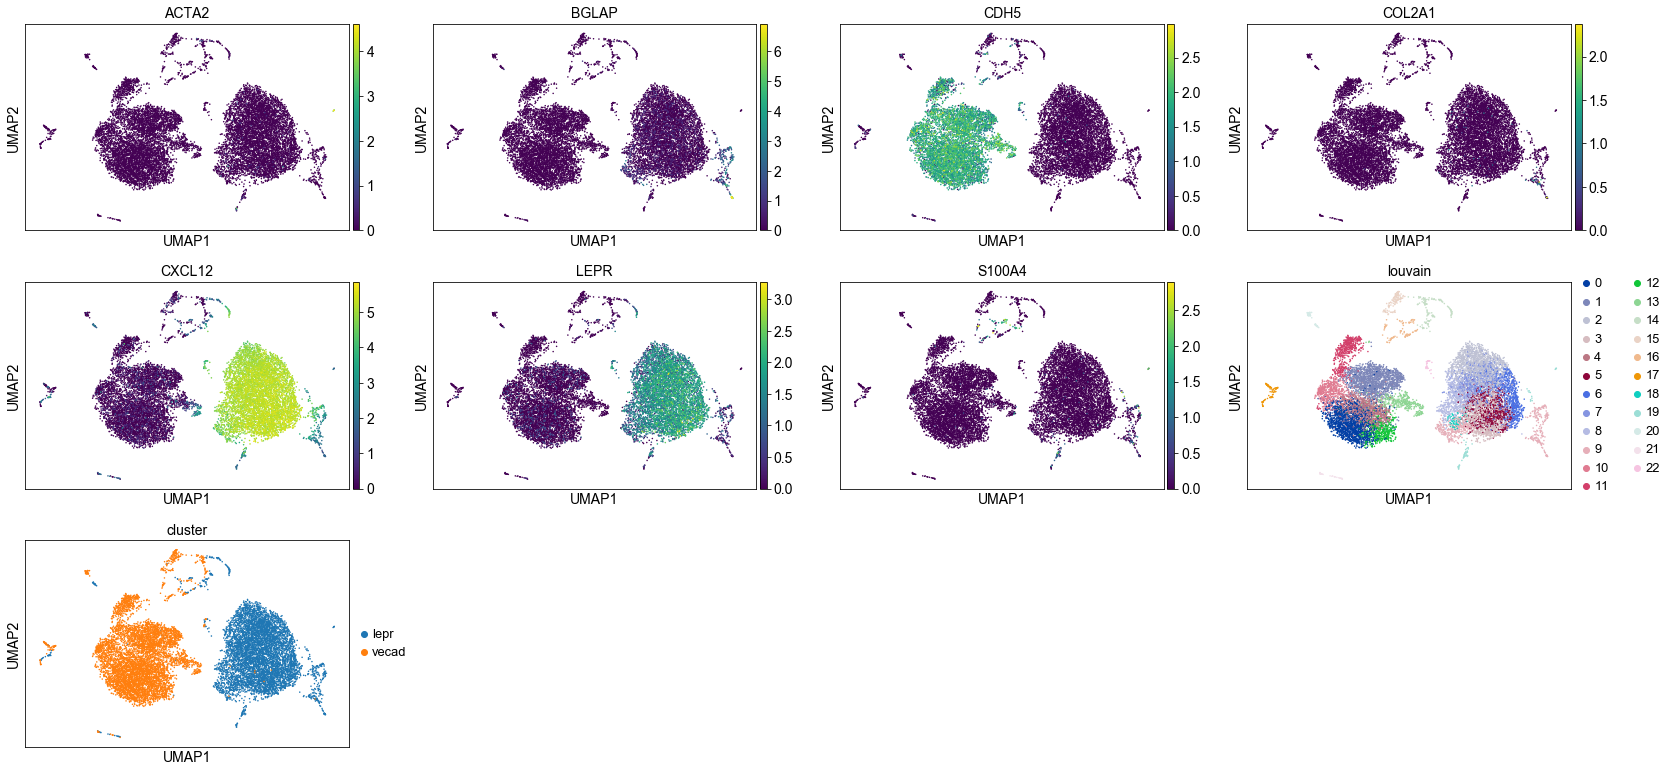

In [27]:
sc.pl.umap(t, color = markers[1:]+['louvain', 'cluster'])

In [28]:
t.write('/home/hsher/processed_single_cell_data/tikhonova_mapped.h5ad')